In [31]:
from typing import Dict, Iterable, Optional

import numpy as np
import torch
import scanpy as sc

from torch.distributions import Normal, Poisson
from torch.distributions import kl_divergence as kld
from torch import tensor
from complementary_models import HALOMASKVIR as HALOVI
from complementary_models import HALOMASKVAE as HALOVAE
import scvi
import pandas as pd


In [32]:
### test whole data with RNA only 
adata_multi = sc.read_h5ad("halo/E18_mouse_Brain/multiomic.h5ad")
adata_multi.obs["batch_id"] = 1
adata_multi.var["modality"] =adata_multi.var["feature_types"]
adata_mvi = scvi.data.organize_multiome_anndatas(adata_multi)

df_meta= pd.read_csv("halo/E18_mouse_Brain/RNA/metadata.tsv",sep = "\t",index_col=0)
bins = df_meta.binned.unique()
times = {}
index = 0
for bin in sorted(bins):
    times[bin] = index
    index += 1

def add_time(row, times):
    timestamp = times[row.binned]
    return timestamp

df_meta['time_key'] = df_meta.apply(lambda row: add_time(row, times), axis=1)

newindex = []

for idx, row in df_meta.iterrows():
    newindex.append(idx+"_paired")

df_meta['Id'] = newindex    

df_meta_sub = df_meta[["Id", 'latent_time']]

df_meta_sub.set_index("Id", inplace=True)
adata_mvi.obs = adata_mvi.obs.join(df_meta_sub, how="inner")
sc.pp.filter_genes(adata_mvi, min_cells=int(adata_mvi.shape[0] * 0.01))

In [33]:
HALOVI.setup_anndata(adata_mvi, batch_key="modality", time_key='latent_time')
model = HALOVI(
    adata_mvi,
    n_genes=(adata_mvi.var['modality']=='Gene Expression').sum(),
    n_regions=(adata_mvi.var['modality']=='Peaks').sum()
)

n_genes :14583
fine tune is False
gate decoder initialization n_input 10, n_output 123883,         n_hidden_local 20, n_hidden_global 128, n_cat_list [1], *cat_list 1


In [4]:
model.train(max_epochs=10)

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=10 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 10/10: 100%|██████████| 10/10 [00:24<00:00,  2.46s/it, loss=1.02e+04, v_num=1]


In [5]:
model.module.set_train_params(expr_train=False, acc_train=True)
model.train(max_epochs=400)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [16:14<00:00,  2.44s/it, loss=2.13e+04, v_num=1]


In [6]:
model.module.set_train_params(expr_train=True, acc_train=False)
model.train(max_epochs=200)

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=200 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 200/200: 100%|██████████| 200/200 [08:10<00:00,  2.45s/it, loss=9.38e+03, v_num=1]


In [7]:
model.module.set_train_params(expr_train=False, acc_train=True)
model.train(max_epochs=200)

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=200 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 200/200: 100%|██████████| 200/200 [07:37<00:00,  2.29s/it, loss=2.11e+04, v_num=1]


In [8]:
model.module.set_train_params(expr_train=True, acc_train=True)
model.train(max_epochs=200)

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=200 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 200/200: 100%|██████████| 200/200 [08:07<00:00,  2.44s/it, loss=1e+05, v_num=1]   


In [7]:
model.module.set_train_params(expr_train=True, acc_train=True)
model.module.set_finetune_params(1)
model.train(max_epochs=100)

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=100 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|██████████| 100/100 [05:44<00:00,  3.45s/it, loss=9.07e+04, v_num=1]


In [8]:
model.module.set_train_params(expr_train=True, acc_train=True)
model.module.set_finetune_params(2)
model.train(max_epochs=100)

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=100 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|██████████| 100/100 [05:44<00:00,  3.45s/it, loss=1.84e+05, v_num=1]


In [26]:
model.module.set_train_params(expr_train=True, acc_train=True)
model.module.set_finetune_params(1)
model.train(max_epochs=20)

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=20 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 20/20: 100%|██████████| 20/20 [01:08<00:00,  3.42s/it, loss=8.03e+04, v_num=1]


In [10]:
model.save("model_AR_mouse",overwrite=True)

In [39]:
model = model.load("model_neural_BM_mouse_causal_002_softmax", adata_mvi)

INFO     File model_neural_BM_mouse_causal_002_softmax/model.pt already downloaded           
n_genes :14583
fine tune is False
gate decoder initialization n_input 10, n_output 123883,         n_hidden_local 20, n_hidden_global 128, n_cat_list [1], *cat_list 1


torch.cat(latent_expr).numpy(), torch.cat(latent_atac).numpy(), \
            torch.cat(latent_expr_dep).numpy(), torch.cat(latent_atac_dep).numpy(), \
                torch.cat(latent_expr_indep).numpy(), torch.cat(latent_atac_indep).numpy(), torch.cat(times).numpy()
    

In [24]:
latent_expr, latent_acc,latent_expr_dep, latent_atac_dep, latent_expr_indep, latent_atac_indep, times  = model.get_latent_representation()

In [12]:
from complementary_models import torch_infer_nonsta_dir


latent_atac_indep = torch.tensor(latent_atac_indep).to('cuda')
latent_expr_indep = torch.tensor(latent_expr_indep).to('cuda')
times = torch.tensor(times).to('cuda')

score3, _, _ = torch_infer_nonsta_dir(latent_atac_indep, latent_expr_indep, times)
score4, _, _ = torch_infer_nonsta_dir(latent_expr_indep, latent_atac_indep, times)
print("score3 {} and score4 {}".format(score3, score4))
score3 - score4

/tmp/ipykernel_7809/709404516.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  times = torch.tensor(times).to('cuda')


score3 0.0469352705639391 and score4 0.03883954961655474


tensor(0.0081, device='cuda:0', dtype=torch.float64)

In [13]:
latent_atac_dep = torch.tensor(latent_atac_dep).to('cuda')
latent_expr_dep = torch.tensor(latent_expr_dep).to('cuda')
times = torch.tensor(times).to('cuda')

score1, _, _ = torch_infer_nonsta_dir(latent_atac_dep, latent_expr_dep, times)
score2, _, _ = torch_infer_nonsta_dir(latent_expr_dep, latent_atac_dep, times)
print("score1 {} and score2 {}".format(score1, score2))
score1 - score2

/tmp/ipykernel_7809/565166213.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  times = torch.tensor(times).to('cuda')


score1 0.06449028288581303 and score2 0.06360191971208536


tensor(0.0009, device='cuda:0', dtype=torch.float64)

In [25]:
from complementary_models import torch_infer_nonsta_dir


latent_atac_indep_t = torch.tensor(latent_atac_indep).to('cuda')
latent_expr_indep_t = torch.tensor(latent_expr_indep).to('cuda')
times = torch.tensor(times).to('cuda')

# times = np.array(times.detach().cpu())
score3 = []
score4=[]

latent_atac_dep_t = torch.tensor(latent_atac_dep).to('cuda')
latent_expr_dep_t = torch.tensor(latent_expr_dep).to('cuda')

score1 = []
score2=[]
sample_num = 700
iterations = 30

for i in range(iterations):
    index = np.random.choice(latent_acc.shape[0] , sample_num)
    score3.append(torch_infer_nonsta_dir(latent_atac_indep_t[index,:], latent_expr_indep_t[index,:], times[index])[0].detach().cpu())
    score4.append(torch_infer_nonsta_dir(latent_expr_indep_t[index,:], latent_atac_indep_t[index,:], times[index])[0].detach().cpu())
    score1.append(torch_infer_nonsta_dir(latent_atac_dep_t[index,:], latent_expr_dep_t[index,:], times[index])[0].detach().cpu())
    score2.append(torch_infer_nonsta_dir(latent_expr_dep_t[index,:], latent_atac_dep_t[index,:], times[index])[0].detach().cpu())





score3 = np.array(score3)
score4 = np.array(score4)

score1 = np.array(score1)
score2 = np.array(score2)

In [26]:
# scores = np.array([score3, score4]).T
# scores.shape

scores = pd.DataFrame({"decouple_atac_to_rna":score3, "decouple_rna_to_atac":score4, "couple_atac_to_rna":score1, "couple_rna_to_atac":score2})
scores.to_csv("results/BM_01_causal.csv")
scores.head()


,decouple_atac_to_rna,decouple_rna_to_atac,couple_atac_to_rna,couple_rna_to_atac
0,0.075063,0.086673,0.100801,0.099793
1,0.072486,0.080730,0.097868,0.096039
2,0.074307,0.082736,0.101802,0.100476
3,0.072703,0.082659,0.098615,0.097878
4,0.073861,0.085367,0.101568,0.100504


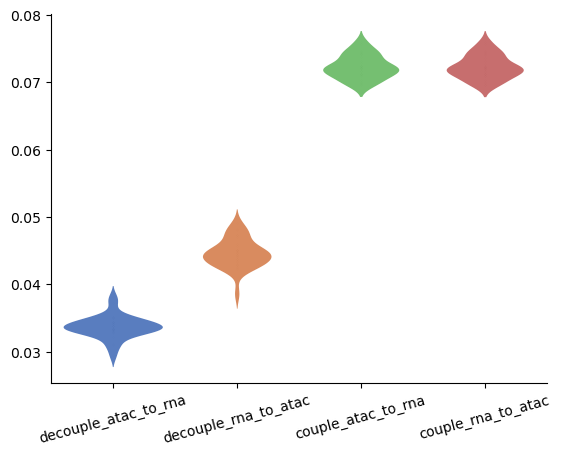

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.violinplot(data=scores, palette="muted",inner="points", linewidth=0.001, edgecolor = "none")
# ax.plot(scores, ".", color="gray", markersize=1)

plt.xticks(rotation=15)
sns.despine()
# plt.savefig("figs/BM_0065_violine.pdf", dpi=1000, bbox_inches="tight")


In [12]:
decouple_stat = (score3 - score4)
# decouple_stat = (score4 - score3)
couple_stat = (score1 - score2)

stats = pd.DataFrame({"decouple":decouple_stat, "couple":couple_stat})
stats.to_csv("results/BM_002_causal_stats.csv")
stats.head()


,decouple,couple
0,-0.010662,0.000088
1,-0.008177,-0.000005
2,-0.010442,-0.000019
3,-0.010527,-0.000033
4,-0.004660,-0.000010


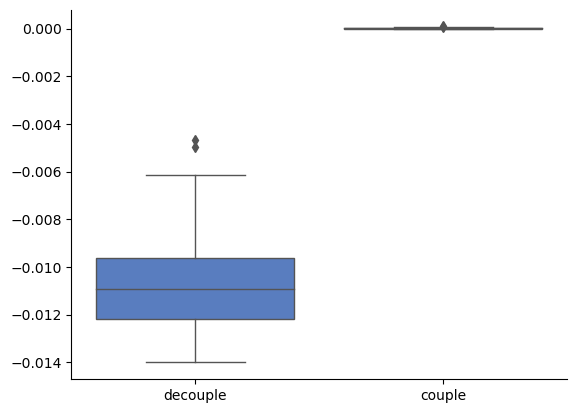

In [13]:

ax = sns.boxplot(data=stats, palette="muted", linewidth=1)
# ax.plot(scores, ".", color="gray", markersize=1)

# plt.xticks(rotation=15)
sns.despine()
# plt.savefig("figs/BM_065_stats.pdf", dpi=1000, bbox_inches="tight")

In [40]:
from sklearn.metrics.cluster import adjusted_rand_score as ARI
from sklearn.metrics import normalized_mutual_info_score as NMI

name = "results/BM_clustering_score_{}.csv".format("002")
sample_num = 1000
iterations = 20
nmi = []
ari = []

for i in range(iterations):
    index = np.random.choice(latent_acc.shape[0] , sample_num)
    datatemp = adata_mvi[index,:]
    datatemp.obsm["latent_rep"] = latent_expr[index, :]
    sc.pp.neighbors(datatemp, use_rep="latent_rep")
    sc.tl.leiden(datatemp, key_added="leiden_latent", resolution=0.4)
    ari_score = ARI(datatemp.obs['celltype'], datatemp.obs['leiden_latent'])
    nmi_whole = NMI(datatemp.obs['celltype'], datatemp.obs['leiden_latent'])
    nmi.append(nmi_whole)
    ari.append(ari_score)

scoredf = pd.DataFrame({"nmi": nmi, "ari":ari})
scoredf.to_csv(name)

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: U

In [83]:
! pip install statannot 


In [9]:

## Test clustering results
latent_expr, latent_acc,latent_expr_dep, latent_atac_dep, latent_expr_indep, latent_atac_indep, times  = model.get_latent_representation()

In [36]:
# adata_mvi.obsm["X_scVI"] = latent_expr
# latent_expr.shape

latent_rep = np.concatenate((latent_expr, latent_acc), axis=1)
latent_rep.shape

(3365, 20)

In [37]:
adata_mvi.obsm["latent_rep"] = latent_rep

In [38]:
sc.pp.neighbors(adata_mvi, use_rep="latent_rep")
sc.tl.umap(adata_mvi, min_dist=0.3)


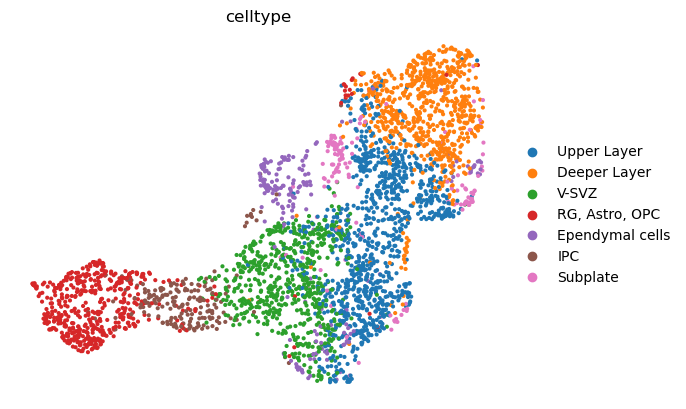

In [18]:
sc.pl.umap(
    adata_mvi,
    color=["celltype"],
    frameon=False,
)

In [39]:
sc.tl.leiden(adata_mvi, key_added="leiden_latent", resolution=0.4)


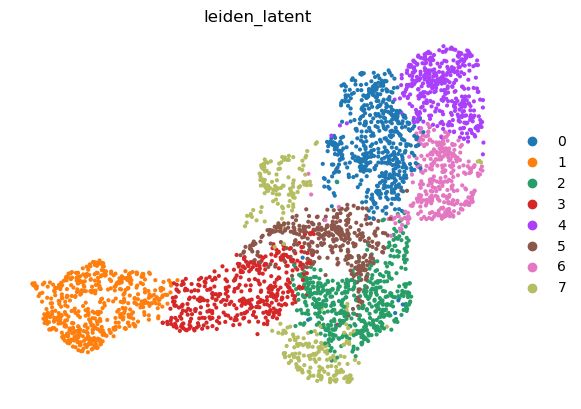

In [29]:
sc.pl.umap(
    adata_mvi,
    color=["leiden_latent"],
    frameon=False,
)

In [30]:
adata_mvi

AnnData object with n_obs × n_vars = 3365 × 138466
    obs: 'celltype', 'batch_id', 'modality', 'latent_time', '_scvi_batch', '_scvi_labels', 'leiden_latent'
    var: 'gene_ids', 'feature_types', 'modality', 'n_cells'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'celltype_colors', 'leiden', 'leiden_latent_colors'
    obsm: 'latent_rep', 'X_umap'
    obsp: 'distances', 'connectivities'

In [40]:
from sklearn.metrics.cluster import adjusted_rand_score as ARI

ari_score = ARI(adata_mvi.obs['celltype'], adata_mvi.obs['leiden_latent'])
ari_score

0.32954408758611575

In [33]:
latent_rep_dep = np.concatenate((latent_expr_dep, latent_atac_dep), axis=1)
latent_rep_dep.shape
adata_mvi.obsm["latent_rep_dep"] = latent_rep_dep
sc.pp.neighbors(adata_mvi, use_rep="latent_rep_dep")
sc.tl.leiden(adata_mvi, key_added="leiden_latent_dep", resolution=0.4)


In [34]:
ari_score = ARI(adata_mvi.obs['celltype'], adata_mvi.obs['leiden_latent_dep'])
ari_score

0.35787314946576143

In [35]:
latent_rep_indep = np.concatenate((latent_expr_indep, latent_atac_indep), axis=1)
adata_mvi.obsm["latent_rep_indep"] = latent_rep_indep
sc.pp.neighbors(adata_mvi, use_rep="latent_rep_indep")
sc.tl.leiden(adata_mvi, key_added="leiden_latent_indep", resolution=0.4)
ari_score = ARI(adata_mvi.obs['celltype'], adata_mvi.obs['leiden_latent_indep'])
ari_score

0.3728063545803137

In [41]:
### calculate NMI scores 
from sklearn.metrics import normalized_mutual_info_score as NMI
nmi_whole = NMI(adata_mvi.obs['celltype'], adata_mvi.obs['leiden_latent'])
nmi_dep = NMI(adata_mvi.obs['celltype'], adata_mvi.obs['leiden_latent_dep'])
nmi_indep = NMI(adata_mvi.obs['celltype'], adata_mvi.obs['leiden_latent_indep'])

print("nmi_whole {}, nmi_dep: {}, nmi_indep: {}".format(nmi_whole, nmi_dep, nmi_indep))

nmi_whole 0.475068785376329, nmi_dep: 0.43475376153970224, nmi_indep: 0.4741729302755922


In [46]:
### read the clustering file
import pandas as pd

df = pd.read_csv("results/BH_clustering_score.csv")
df["nmi"] = df["nmi"]+0.1
df["ari"]=df["ari"] + 0.1
df.head()

,alpha,nmi,ari
0,1,0.513993,0.358450
1,1,0.547232,0.401635
2,1,0.578815,0.382540
3,1,0.555847,0.418270
4,1,0.544193,0.383681


In [45]:
df.to_csv("results/BH_clustering_score.csv")

In [30]:
measures = df.loc[0, :]

metric                            ARI
halo+rna+atac                0.495441
halo+rna_dep +atac_dep       0.457873
halo+rna+indep+atac_indep    0.472806
MultiVI                      0.384186
GLUE                         0.443356
PCA_RNA                      0.307255
SVD_ATAC                     0.141996
MOFA                         0.348744
scMVP                         0.49079
Name: 0, dtype: object

In [ ]:
### ablation study in terms of 